<a href="https://colab.research.google.com/github/2018130864-KwonHaYeon/class2021Spring/blob/main/sound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **20210426 수업**

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt
import IPython.display as ipd
import numpy as np
from scipy.signal import lfilter

- 필요한 package들

# **Phasor**
- 다양한 종류의 sine wave를 만드는 것 (pure tone)
1. time 2. phase 3. sin(phase) 4. plot (x축=time, y축=sin값)

In [3]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz

- amplitude: wave의 진폭
- amplitude = 1 이면, sine wave의 높이가 -1~1의 range를 가진다.
- sr = sampling rate
- sr = 10000 이면, sine wave를 구성하는 점들이 1초에 10000개의 sample로 이루어져 있다.
- duration = 0.5초의 길이
- frequency = 1초에 반복되는 unit이 몇개 있는가? (1초에 굴곡이 4번 있다면, 4 Hz)
- frequency는 소리의 높낮이와 관련이 있다.
- sampling rate과 frequency는 1초당 몇 개가 있는지를 세기 때문에 Hz라는 단위를 쓸 수 있다.

In [4]:
# generate time
t = np.arange(1, sr * dur+1)/sr

- 시간의 개념을 만들어야 한다. (sine 함수에 시간 개념이 존재하지 않기 때문에)
- sampling rate이 있으면 time을 만들 수 있다.
- 시간이 무한대이기 때문에 몇개로 만들지 정해야 한다. (빽빽하게 만들지, 듬성듬성하게 만들지)
- 반드시 phase(각도값)와 time을 sync시켜줘야 한다.
- 시간 값을 만들고, 각도 값을 얹어준다.
- sampling rate = 시간을 얼마나 잘게 쪼갤 것인가? (1초를 10000개로 쪼갠다)
- np.arange(1, sr*dur+1)
- [1,2,3,4,5, .... 5000]/sr

--> [1/10000, 2/10000, 3/10000, ...5000/10000]

--> "초"의 개념이 된다.

--> np.arange(1, 10000*1+1)로 가정 --> np.arange(1,10001)

--> 1~10000까지의 숫자를 만들어 낸다.

--> 만약 duration이 0.5라면, 1~5000까지의 숫자를 만들어낸다.

In [5]:
# generate phase
theta = t * 2*np.pi * freq   

- 시간을 만들고, 각도의 개념으로 바꾼다. (radian 형태의 phase)
- 1초 * 2π: 제일 끝의 값이 2π가 되고, 나머지 값들은 그에 맞춰짐 (0부터 2π radian까지, 한 바퀴 짜리)
- 100개짜리를 만들어야 하므로 (원하는 frequency = 100이므로) 제일 끝에 있는 것에 100을 곱하여 맨 끝이 2π 가 아니라 200 π가 되어야 한다.

In [24]:
# generate signal by cosine-phasor
s = amp * np.sin(theta)

- sine wave를 만들기 위한 함수
- sin(): 괄호 안에 각도가 radian의 형태로 변형되어 들어간다. (180도, 360도가 아니라 radian 으로 변환)
- amplitude가 표현이 되어 있어야 한다.(그래프의 진폭)

Text(0, 0.5, 'real')

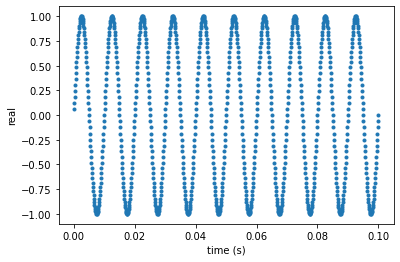

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

- plot(x,y)

x = [1,2,3]

y = [-1,0,1]

- x가 1일 때 y는 -1에 점을 찍고, 2일때 0, 3일때 1에 찍는다.

- x축은 phase, 각도 값이 아니라 시간
- t의 현재 sample 개수는 5000개

Text(0, 0.5, 'real')

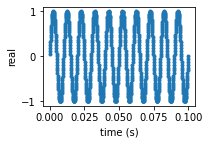

In [8]:
fig = plt.figure()
ax = fig.add_subplot(221)
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

- subplot(235라면): 첫번째와 두번째는 2x3 의 행렬 (세로 2, 가로 3), 세번째는 그 행렬 가운데 5번째를 선택

- duration이 0.5초고 sampling rate이 10000이면, 5000개가 있다.

In [9]:
ipd.Audio(s, rate=sr)

## **20210428 수업**

- sin이 아니라, e^(theta*i)를 사용한다.
- 이때, e와 i는 상수이므로 a + bi (복소수) 형태가 된다.

e= 2.71....

i = 복소수 ( a+bi, if b<>0 then 허수, if b=0 then 실수 )
- a part = real 값, b part = Imaginary 값
- 실수일 경우 축의 직선에 표시가 되지만, 허수일 경우 사분면 전체(2차원 공간 전체)를 활용하여 점이 찍히게 된다.

In [10]:
theta = np.pi
np.sin(theta)

# np.exp(theta*1j)

1.2246467991473532e-16

- 유효숫자의 개념

In [11]:
theta = np.pi/2
np.sin(theta)

# np.exp(theta*1j)

1.0

- sin 90도

In [12]:
theta = np.pi/4
np.sin(theta)

# np.exp(theta*1j)

0.7071067811865475

- sin 45도

In [13]:
theta = np.pi*0       # 0 90 180 270 360 0 pi/2 pi 3pi/2 2pi
np.sin(theta)

np.exp(theta*1j)

(1+0j)

- sin 0도

In [14]:
theta = np.pi/2       # 0 90 180 270 360 0 pi/2 pi 3pi/2 2pi
np.sin(theta)

np.exp(theta*1j)

(6.123233995736766e-17+1j)

- 0+i --> (0,1)

In [15]:
theta = np.pi     # 0 90 180 270 360 0 pi/2 pi 3pi/2 2pi
np.sin(theta)

np.exp(theta*1j)

(-1+1.2246467991473532e-16j)

 - -1+0i --> (-1,0)
 - 사분면에 옮겨 그리면 각도기에 그려진 180도, 90도, 0도, 270도처럼 된다.

In [32]:
# generate signal by complex-phasor
c = amp * np.exp(theta*1j)

Text(0.5, 0, 'imag')

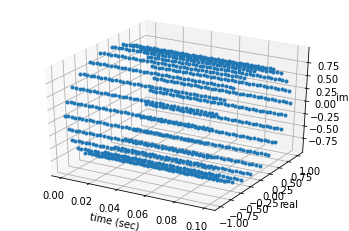

In [33]:
fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (sec)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

- 입체, 3차원 (vector)
- complex phasor는 sin,  sin을 모두 활용 (실수부는 co sin = y축을 활용), (허수부는 sin = z축을 활용)
- x축 = 시간
- (a,b,c) 형태로 데이터가 나온다.
- sine wave 형태로 보이는 부분 => 허수 부분에 집중해서 보고 있음 (옆에서 보는 것, imaginary)
- co sin 형태로 보이는 부분 => 실수 부문에 집중해서 보고 있음 (위에서 보는 것, real)
- 오일러 공식 euler formula
- e^(theta*i) = cos(theta) + sin(theta)i
- e^(pi*i) = -1
- e^(pi*i) + 1 = 0

In [34]:
import plotly.graph_objects as go
import numpy as np

x, y, z = t[0:200], c.real[0:200], c.imag[0:200]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.update_layout(scene = dict(
                    xaxis_title='time (sec)',
                    yaxis_title='real',
                    zaxis_title='imag'))
fig.show()

- 아래보다 위가 더 자세하게 plot되어 있다.

In [35]:
ipd.Audio(c.real, rate=sr)

# **20210503 수업**

### phasor에는 두 가지 종류가 있음
1. sin, cos
- sinusoidal (cos.sin 상관 없음)
- sin(theta) ==> a로 값이 나옴
2. complex phasor
- e^(theta*i) ==> a+bi로 값이 나옴
- theta = 0 이면 a+bi의 형태에서 a=1, b=0의 값이 나옴 (1,0)
- theta = 90(pi/2) 이면 a=0, b=1 (0,1)
- theta = pi 이면 a=-1,b=0 (-1,0)
- theta = 3/2 pi이면 a=0, b=-1 (0,-1)

A = 1+i


A^2 = (1+i)(1+i) = 2i --> (0,2)
- **길이가 1인 원에서는 복소수를 제곱하면 각도만 2배가 되고 크기는 1을 유지한다.**(길이가 1이 아니면 점점 커짐)
- e^(30도 x i)를 제곱하면 --> e^(60도 x i)
- complex phasor의 특징: complex number가 나오는데 그것의 크기가 반드시 1이 되며, 각도값이 비례하는 형태로 나타난다.



- 시간의 개념이 없다. 시간의 개념이 들어가면 복잡한 모양으로 나온다.


e^(theta*i)

- *theta 값에는 0 ~ 2pi 까지 들어감*



- a+bi에서 실수 부분(a)만 떼어서 이야기를 한다면, cos(theta)와 동일하다.
- a+bi에서 허수 부분(b)만 떼어서 이야기를 한다면, sin(theta)와 동일하다.

In [27]:
def phasor_sine(amp, sr, dur, freq):

  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq   
  s = amp * np.sin(theta)

  return s, t, theta

In [28]:
amp = 1; sr = 10000; dur = 1; freq = 300
s, t, theta = phasor_sine(amp, sr, dur, freq)
ipd.Audio(s, rate=sr)

In [29]:
def phasor_complex(amp, sr, dur, freq):

  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq   
  c = amp * np.exp(theta*1j)

  return c, t, theta

In [30]:
amp = 1; sr = 10000; dur = 1; freq = 300.0
c, t, theta = phasor_complex(amp, sr, dur, freq)
ipd.Audio(c.imag, rate=sr)

# Generate Pulse Train (=Source)
- 성대에서 나는 source를 만든다.

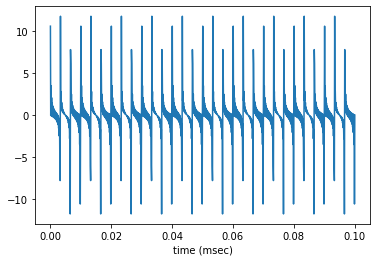

In [31]:
# parameter setting
amp = 1
sr = 10000
dur = 0.5

F0 = 300
Fend = int(sr/2)                    #Nyquist Frequency

s_all = 0
for freq in range(F0, Fend+1, F0):
  s, t, theta = phasor_sine(amp, sr, dur, freq)
  s_all += s

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s_all[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s_all, rate=sr)

- range를 이용해서 계속 범위를 늘림
- Fend = int 를 억지로 만들어줌

# **20210510 수업**

- 참고할 만한 사이트: 공돌이의 수학정리노트 - 시간 샘플링과 나이퀴스트 이론
- Nyquist Frequency는 sampling rate의 반이다.

1) 최소한의 점으로 표현하려면 6개 정도 필요할 것이다.

2) frequency: 3 Hz인데, sampling rate는 최소 몇 개가 표현할까? -> 6개 (1초에)

3) sampling rate이 최소 6 Hz는 되어야 3Hz를 표현할 수 있다.

- amplitude가 표현이 되어 있어야 한다.(그래프의 진폭)
- s = amp x np.exp(theta*0j)

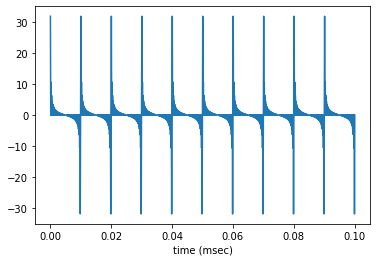

In [37]:
# parameter setting
amp = 1
sr = 10000
dur = 0.5

F0 = 100
Fend = int(sr/2)  

s_all = 0
for freq in range(F0, Fend+1, F0):                  # Nyquist Frequency
  s, t, theta = phasor_sine(amp, sr, dur, freq)
  s_all += s

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s_all[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s_all, rate=sr)

- (F0, Fend+1, F0) --> (100, 500, 100) 의 의미. 100부터 500까지 100의 간격으로 센다.
- s-all = s_all+s --> 현재의 어떤 변수를 s를 더해서 업데이트 해준다.
- a += b --> a = a+b 와 같은 뜻

# Filter Source

- (모음 f1, f2 이미지)
- Pulse train = Harmonics = Source --> 스펙트럼 그림으로 나타내면 x축은 frequency, y축은 amplitude
- BW = Bandwidth = 산맥의 두께
- band width가 작으면 산맥이 뾰족하고, 크면 완만함

In [38]:
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

- Hertz to Omega 함수
- Resonance 함수

In [39]:
s = s_all

In [41]:
RG = 0  # RG is the frequency of the Glottal Resonator
BWG = 100  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

- RG 부분 = 산맥의 Frequency
- BWG 부분 = 그것의 Band width
- resonance 함수에 해당 값을 넣으면 a,b라는 값을 뽑아주고, 그 a,b를 lfilter에 넣는다.
- 최종적으로 filter된 s가 나온다.
- 0 Hz에 둠을써, gradually decrease되는 pulse train을 만든다.

In [42]:
RG = 750  # RG is the frequency of the 1st Formant
BWG = 90  # BWG is the bandwidth of the 1st Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [43]:
RG = 1187  # RG is the frequency of the 2nd Formant
BWG = 110  # BWG is the bandwidth of the 2nd Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [44]:
RG = 2595  # RG is the frequency of the 3rd Formant
BWG = 170  # BWG is the bandwidth of the 3rd Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [45]:
RG = 3781  # RG is the frequency of the 4th Formant
BWG = 250  # BWG is the bandwidth of the 4th Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

- 위에서부터 순서대로 f0~f5에 해당한다.

In [46]:
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)

- 입술 모양을 구현해서 증폭을 해서 사람 목소리처럼 나오게 된다.